## Lab 9: Skydiver

### Exercise 1:
A skydiver jumps from a plane at $h=2000\mathrm{m}$. At $h_\mathrm{p} = 300\mathrm{m}$ the skydiver releases the parachute. How does the velocity evolve as a function of height?

1. Calculate problem constant $$k = \frac{1}{2} \frac{C_\mathrm{D} \rho A}{m}$$  as introduced in class using the astropy units package.
2. In addition to the differential equation $\frac{dv}{dt}$ derived in class solve simultaneously the differential equation $\frac{dh}{dt} = v$.
2. Your plot should include a line for the analytically determined terminal velocity.
3. From the terminal velocity, estimate an appropropriate time step for the integration.
4. Perform a convergence study by doing a series of 3 to 4 runs with decreasing step size.

Recall how to approach a programming task:

1. Sketch out the algorithm you want to use. This can involve some kind of flow-diagram and writing out the program in pseudo-programing language.
2. Implement algorithm; while you write it add reasonable comments, short and relevant. Test each step to make sure you avoid accumulating errors that are harder to find later on.
3. Run algorithm and generate results.
4. Test the program carefully. What can you do to convince yourself that your algorithm is working correctly?

$$k = \frac{1}{2} \frac{C_\mathrm{D} \rho A}{m}$$

$$c_d=\frac{2F_d}{\rho u^2 A}$$


In [72]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import math as mp

### change these constants ###
step=20
C_Dm=0.82
rho=1.225
A1=0.2
A2=2
H_j = 2000 ## meters
H_p = 300  ## meters
mass = 95+24 ## kilograms
### end changeable constants ###

107.74857816955625
34.073092166049406


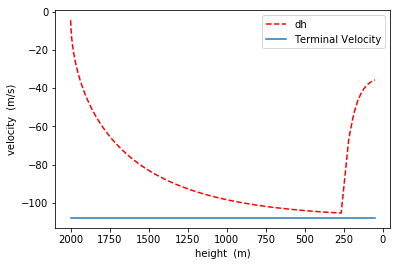

In [73]:
k1 = 0.5*(C_D*rho*A)/mass
g = 9.8          # m/s**2      # in the lab
v_t1 = mp.sqrt(g/k1)
k2 = 0.5*(C_D*rho*A2)/mass
print(v_t1)
v_t2 = mp.sqrt(g/k2)
dt = (1000./v_t1)/step  #estimate time step
print(v_t2)
def rhs_sdiver(v,dt,g,k):
    'Evaluate RHS for skydiver problem, advance one time step'
#     print("k",k,"dt",dt,"v",v,"g",g)
    v = v + dt*(k*v**2 - g)
    return v

tt=[];vv=[];hh=[];
tmax=3*1000./v_t1
t=0; v=0; h=H_j;

while t < tmax and h>H_p:
    d_h=v*dt
    h+=d_h
    hh.append(h)
    v=rhs_sdiver(v,dt,g,k=k1)
#     print(v)
    t += dt
    tt.append(t)
    vv.append(v)
while t<tmax and h>=0:
    d_h=v*dt
    h+=d_h
    hh.append(h)
    v=rhs_sdiver(v,dt,g,k2)
#     print(v)
    t += dt
    tt.append(t)
    vv.append(v)
hh=hh
plt.close(1);plt.figure(1)
plt.gca().invert_xaxis()
plt.plot(np.array(hh), np.array(vv), 'r--',label="dh")
plt.plot(np.array(hh),-v_t1*np.ones((len(hh))),label="Terminal Velocity")
plt.xlabel( 'height  (m)' )
plt.ylabel( 'velocity  (m/s)' )
plt.legend()
plt.show()

### Exercise 2:
Solve the two coupled ODEs for height and velocity using  a second differential equations 
Solve the skydiver problem using `scipy.integrate.odeint`. Study the docstring for instructions. Pay attention to the time array along which the integration is performed. Make plots of the time evolution of the vertical position and the speed of the skydiver. 